# TRABAJO FINAL
# TECNICAS PARA LA CIENCIAS DE DATOS
### Miguel Santiago Gómez Suárez


## Ejercicio 1
Visualización de las time-series de performance x_i (t) para cada usuario i. Ten en cuenta que el número de puntos de cada serie es diferente (2 pts).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('dataInformation.csv', decimal=',', thousands='.')

# Visualizar las primeras filas del DataFrame para asegurarte de que se haya cargado correctamente
print(data.head())
print(data.info())

   patient_id         day  score
0          75  2023-01-01   4208
1       48249  2023-01-01   2656
2       39201  2023-01-01    537
3       43205  2023-01-01   7233
4       47600  2023-01-01   5244
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465183 entries, 0 to 465182
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   patient_id  465183 non-null  int64 
 1   day         465183 non-null  object
 2   score       465183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.6+ MB
None


In [2]:

data['day'] = pd.to_datetime(data['day'])
id_counts = data['patient_id'].value_counts()
ids_to_keep = id_counts[id_counts > 1].index

# Finalmente, filtras el DataFrame original para mantener solo las filas con los ID deseados
data = data[data['patient_id'].isin(ids_to_keep)]

# Ordenar el DataFrame por la columna 'patient_id' (usuarios) y luego por 'day' (fechas)
data = data.sort_values(by=['patient_id', 'day'])

In [3]:
print(data.head())

        patient_id        day  score
15464           11 2023-01-16    488
28236           11 2023-01-24   4599
39770           11 2023-01-31    695
49101           11 2023-02-06   3605
224828          11 2023-05-22   4894


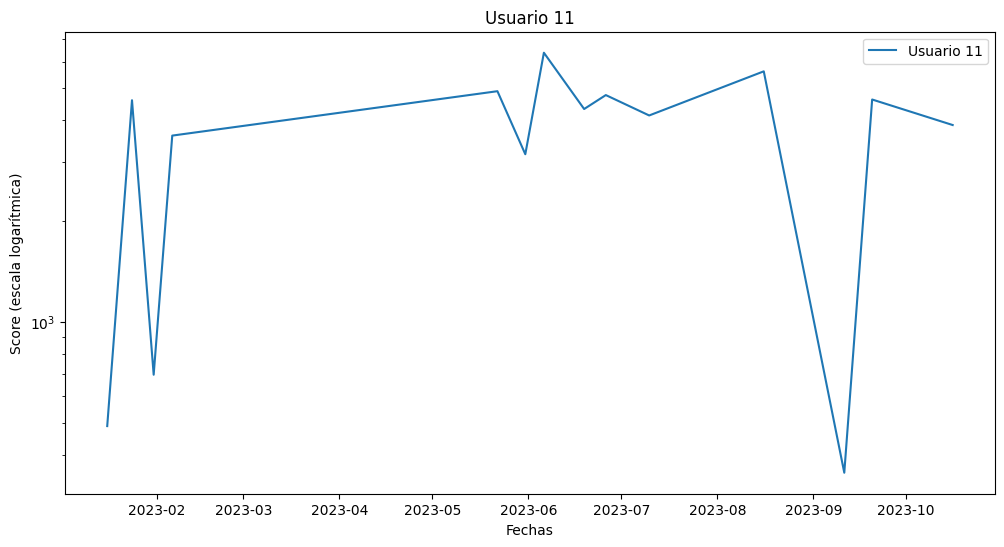

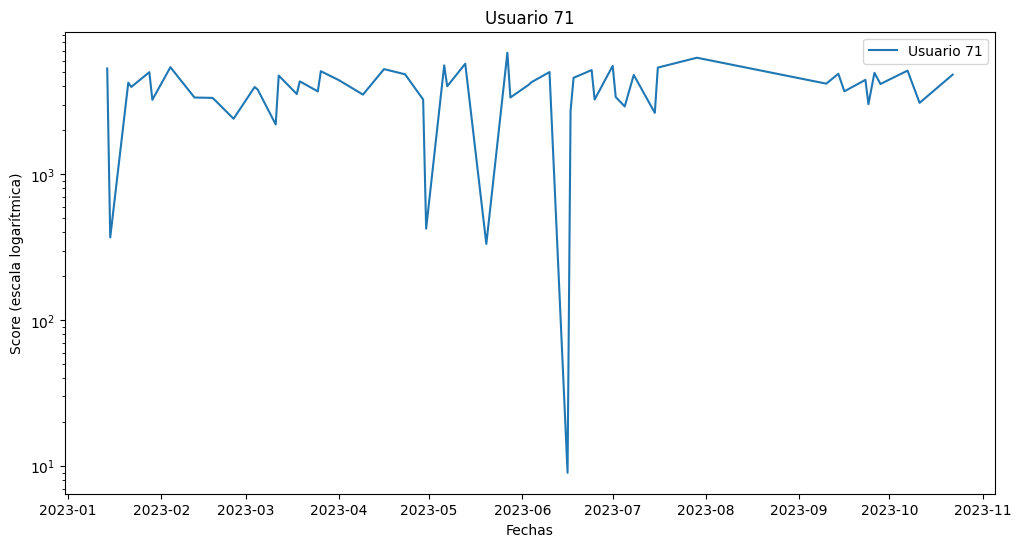

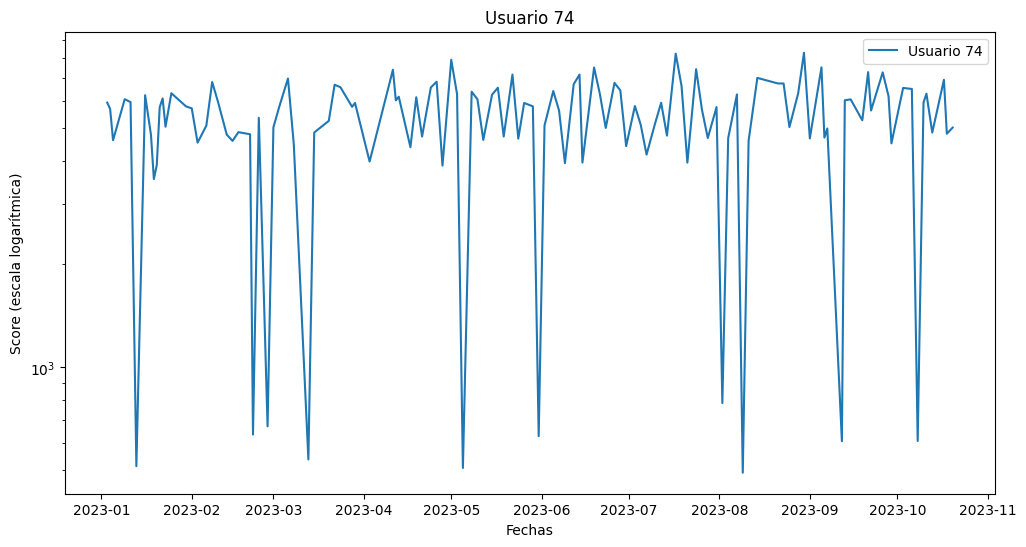

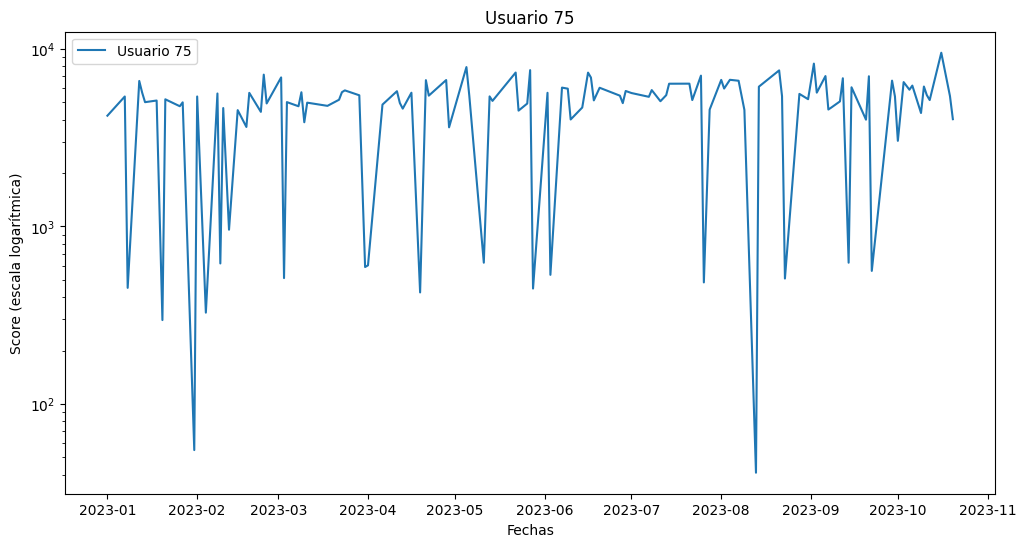

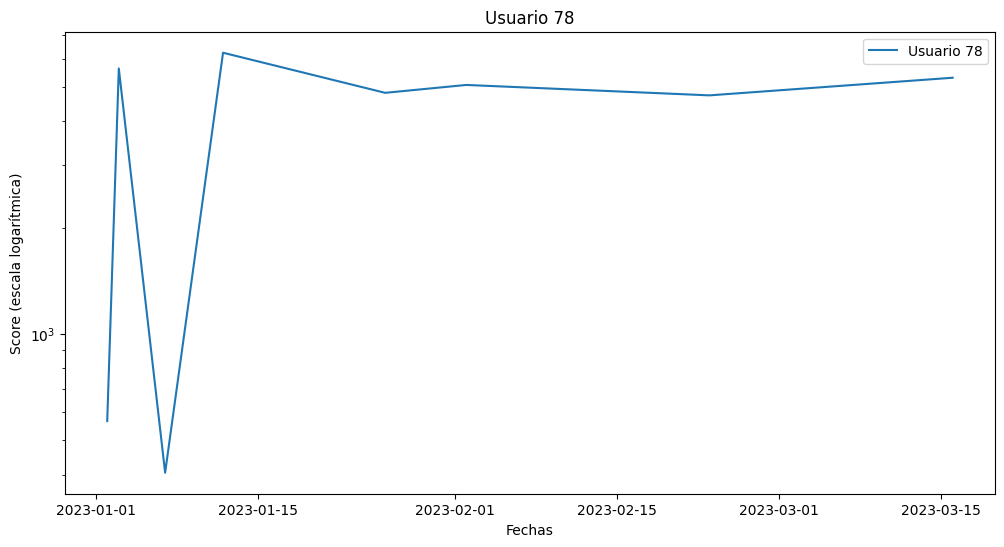

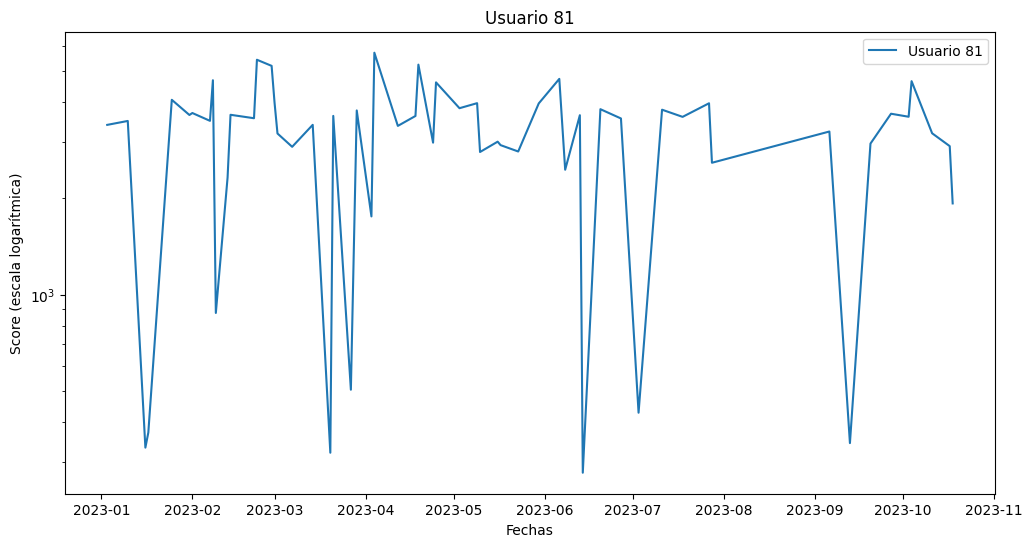

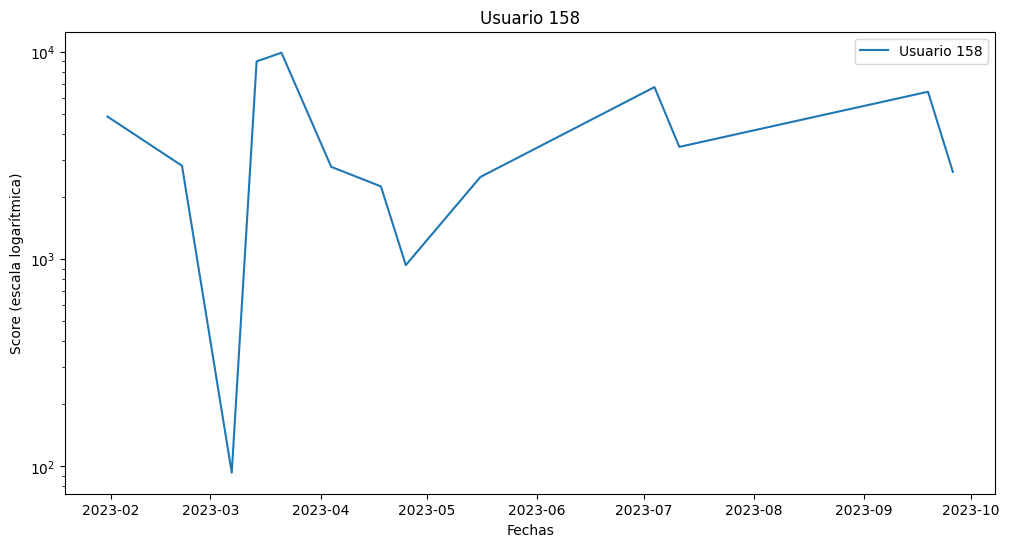

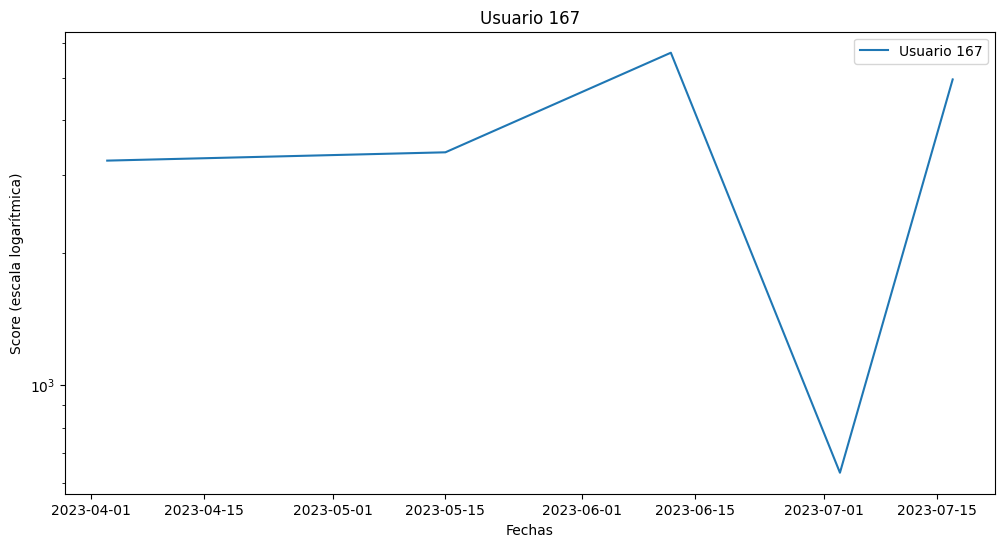

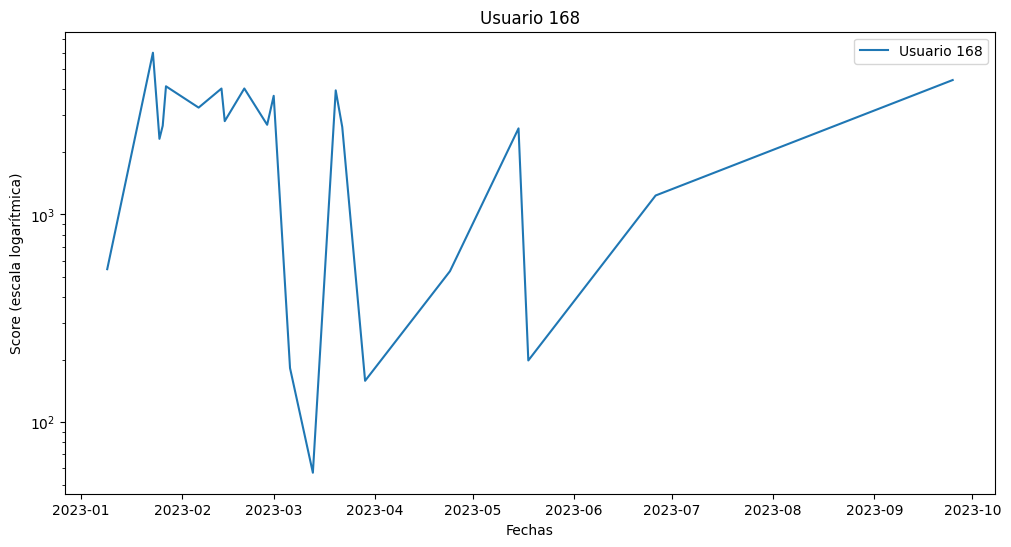

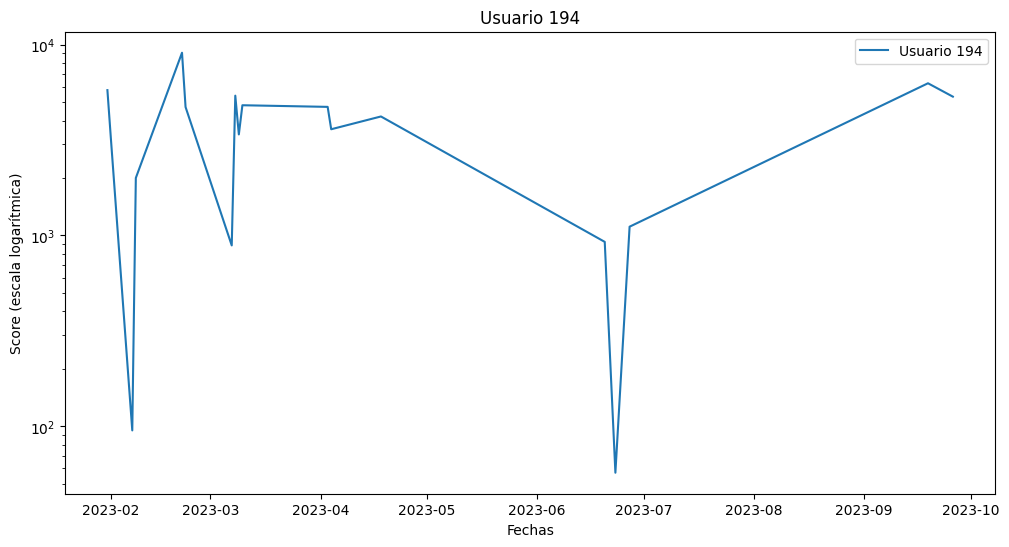

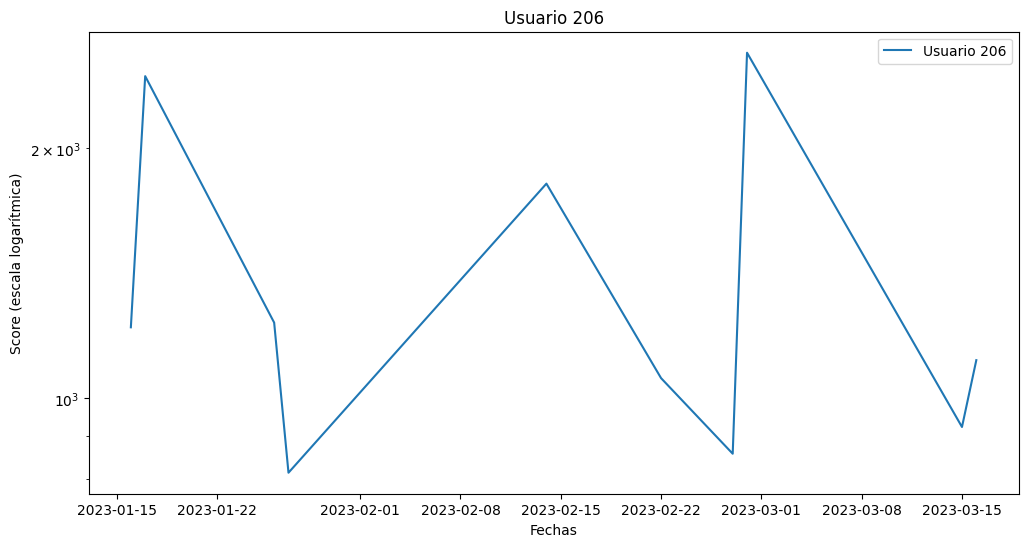

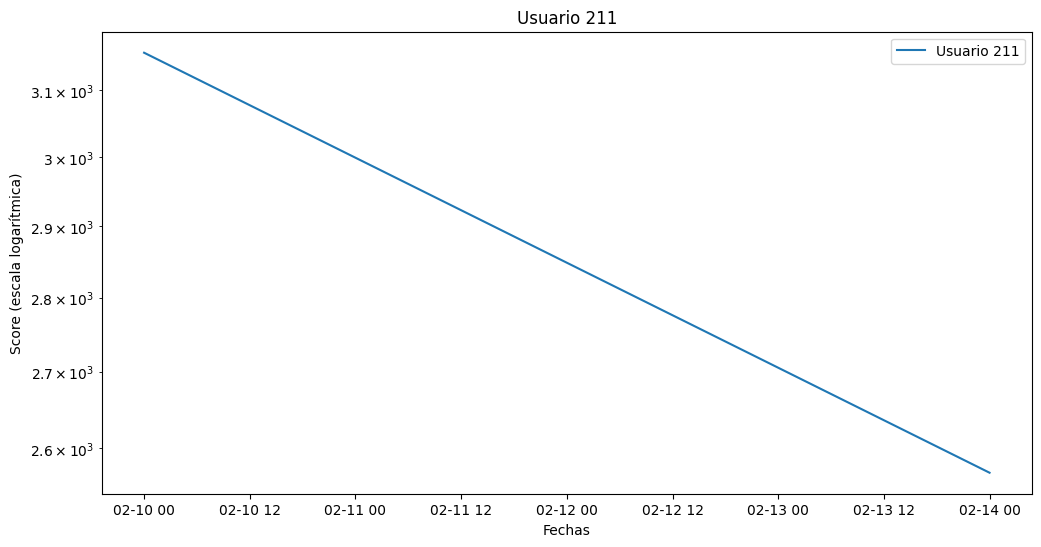

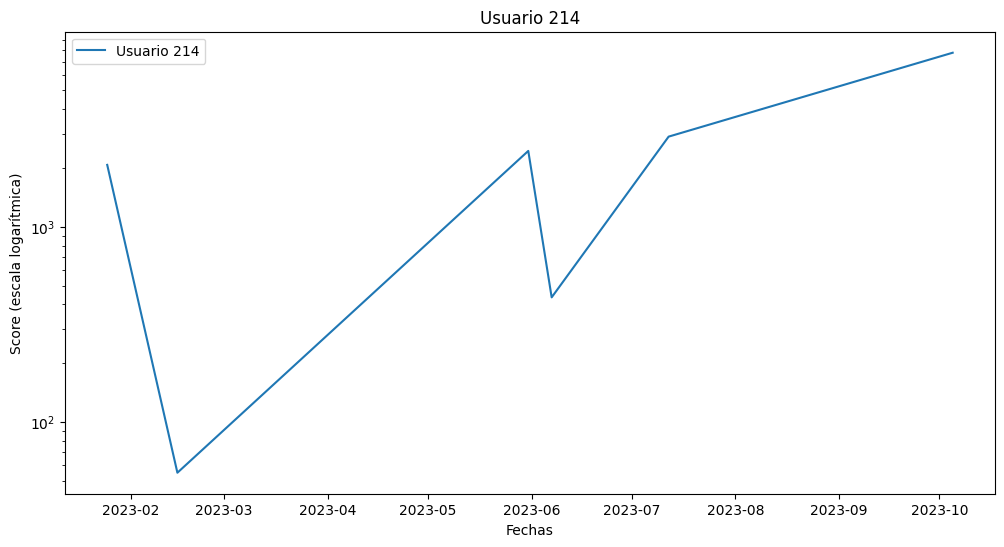

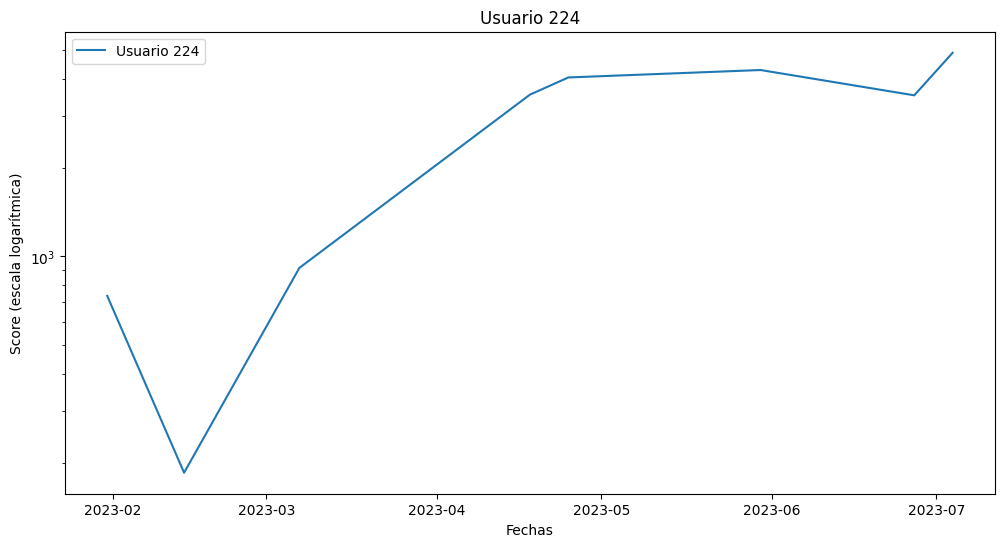

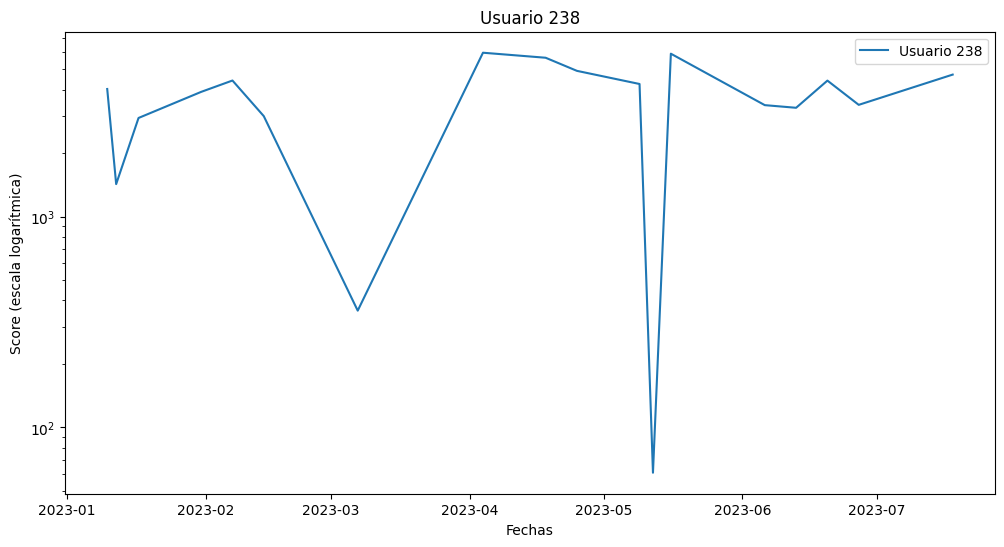

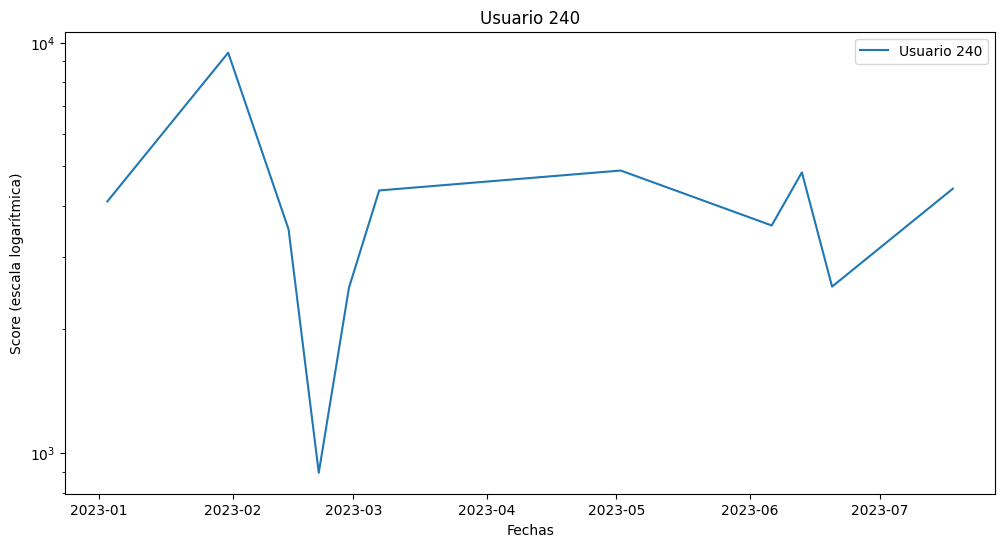

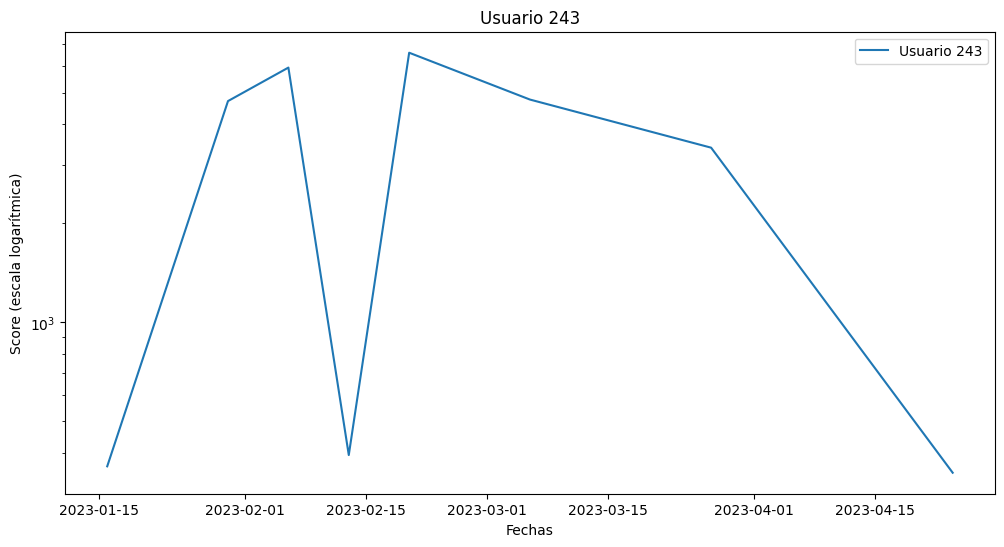

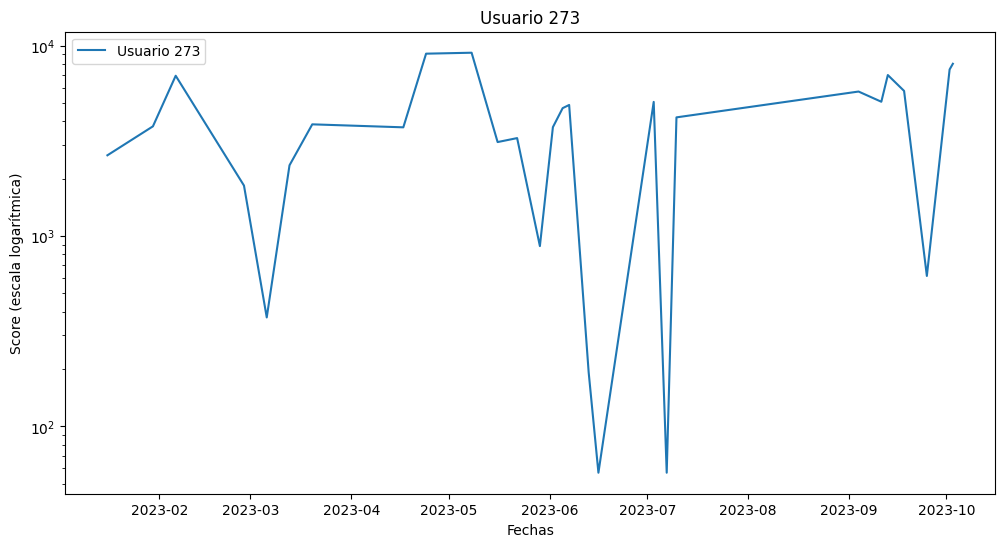

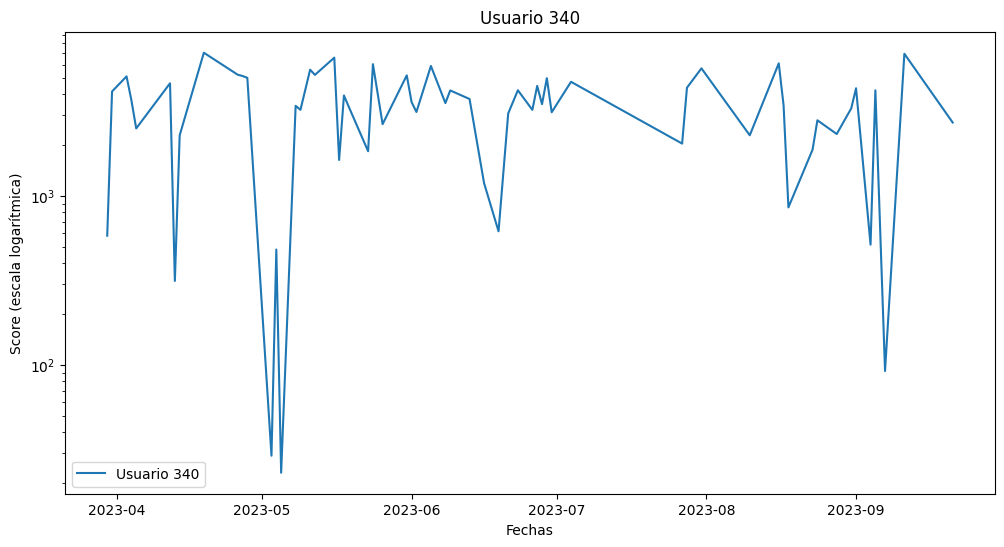

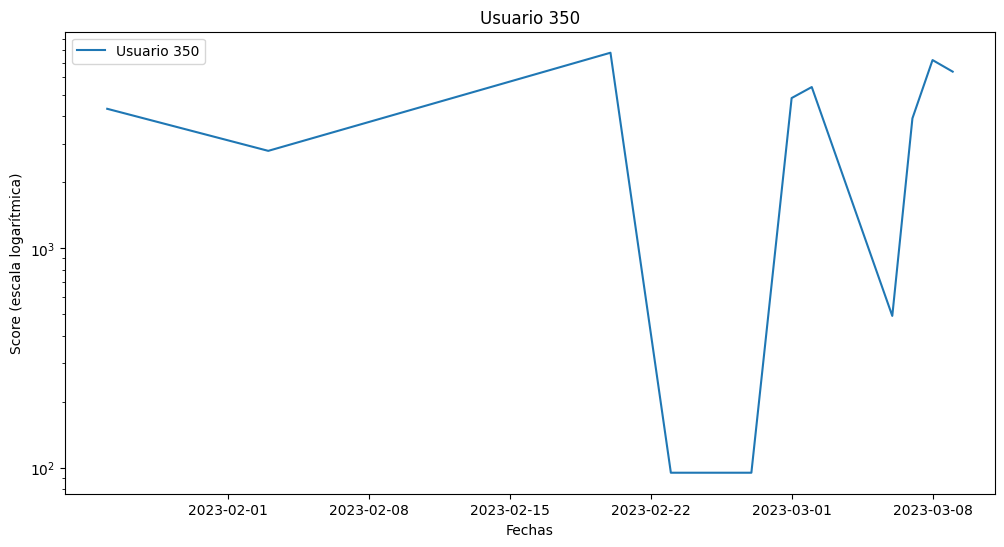

In [4]:
# Definir el número máximo de gráficas a generar (ajusta este valor según tus necesidades)
L = 20  # Cambia esto al número deseado

# Contador para llevar el registro de las gráficas generadas
graph_count = 0
unique_users = data['patient_id'].unique()
for user_id in unique_users:
    if graph_count >= L:
        break  # Detenerse después de generar L gráficas
    user_data = data[data['patient_id'] == user_id]
    plt.figure(figsize=(12, 6))
    plt.title(f'Usuario {user_id}')
    # Si hay más de un registro, usar escala logarítmica en el eje Y y trazar una línea
    plt.plot(user_data['day'], user_data['score'], label=f'Usuario {user_id}')
    plt.yscale('log')

    plt.xlabel('Fechas')
    plt.ylabel('Score (escala logarítmica)')
    plt.legend(loc='best')
    graph_count += 1
    # Mostrar la gráfica
    plt.show()



**Concluciones**

De la anterior agrupación de gráficas, podemos identificar dos comportamientos significativos. En primer lugar, la representación de los datos en escala logarítmica resulta fundamental, especialmente debido a la amplia disparidad en los valores registrados entre distintos usuarios. Sin esta escala, la variabilidad en los valores más bajos resulta difícil de apreciar, ya que los valores extremadamente altos dominan la visualización.

Por otro lado, es importante destacar que algunos usuarios muestran una única entrada en sus series temporales, lo que se traduce en gráficos con ausencia de datos visibles. Esto ocurre cuando no se dispone de suficientes registros para construir un verdadero time-series de su score. Este fenómeno es especialmente evidente en casos como el usuario 80, donde la falta de datos impide la generación de una representación significativa de su rendimiento a lo largo del tiempo.

Nota: Se coloca un límite L para poder realizar el procesado de la información y tomar unas cuantas graficas de ejemplo.

## Ejercicio 2
Construir y visualizar nuevas series temporales de p_i (t), donde en cada tiempo se muestre el percentil p_x  del valor de performance x calculado sobre toda la muestra.

AYUDA: Puedes considerar que los momentos de la distribución de valores no cambian con el tiempo.   ¿Cuánto de válido es esta aproximación? (3 pts)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

# Crear una lista para almacenar las series temporales de percentiles
percentile_series = []

# Número máximo de gráficas a generar (ajusta este valor según tus necesidades)
# L = 20
graph_count = 0

# Obtener los usuarios únicos
unique_users = data['patient_id'].unique()
L = len(unique_users) # Si quisieramos todos los datos
for user_id in unique_users:
    if graph_count >= L:
        break  # Detener después de generar L gráficas
    user_data = data[data['patient_id'] == user_id]

    percentiles = np.percentile(user_data['score'], np.arange(1, 101))

    user_percentiles = []
    for value in user_data['score']:
        index = np.searchsorted(percentiles, value) + 1
        user_percentiles.append(index)

    percentile_series.append((user_id, user_data['day'], user_percentiles))

    graph_count += 1

# for user_id, user_days, user_percentiles in percentile_series:
#     plt.figure(figsize=(12, 6))
#     media = np.mean(data[data['patient_id'] == user_id]['score'])
#     varianza = stats.stdev(data[data['patient_id'] == user_id]['score'])
#     plt.title(f'Usuario {user_id} - Percentiles - Media = {media} - Desviacion Std = {varianza}')
#     plt.plot(user_days, user_percentiles, label=f'Percentil para Datos del Usuario')

#     plt.xlabel('Fechas (o tiempo)')
#     plt.ylabel('Percentil')
#     plt.legend(loc='best')
#     plt.show()

**Concluciones**

A partir de los análisis realizados, se observan dos patrones notables. En primer lugar, para muchos usuarios, el percentil 50 se mantiene relativamente constante a medida que el tiempo avanza, lo que sugiere una estabilidad en el rendimiento cognitivo en esos casos.

Por otro lado, al considerar la aproximación de que los momentos de la distribución de valores no cambian con el tiempo, encontramos evidencia de que esta suposición es válida en todos los casos. Esto se evidencia al examinar la variabilidad de los datos, representada por la desviación estándar. La variabilidad en los datos, en comparación con la media, es baja en las gráficas analizadas, lo que sugiere que efectivamente la variabilidad de los datos es pequeña en el tiempo y se puede suponer una distribución de variación constante.

Nota: Se coloca un límite L para poder realizar el procesado de la información y tomar unas cuantas graficas de ejemplo.

## Ejercicio 3
Si definimos tres clases de la siguiente forma:

- C_1={x∶ x ∈ p_x ≤ 20}  
- C_2={x∶ x ∈ 20 < p_x ≤ 80}     
- C_3={x∶ x ∈ p_x > 80}

calcula en función de ▁x (siendo  ▁x el promedio de x en los primeros 15 días) la pertenencia a cada clase tras 6 meses de la primera medida registrada.

AYUDA: Realiza una clasificación supervisada ó multiclase ó 1 clase vs. el resto. Define cohortes de entrenamiento, validación y testeo (5 pts)


In [6]:
import statistics
import datetime
# Definir las reglas para las clases
def assign_class_label(percentile):
    if percentile <= 20:
        return 'C_1'
    elif 20 < percentile <= 80:
        return 'C_2'
    else:
        return 'C_3'

# Iterar sobre los primeros L usuarios en la serie de percentiles
class_labels = []

# Recorrer cada usuario en percentile_series y asignar etiquetas de clase
for user_id, day, percentiles in percentile_series[:L]:  # Limitar el bucle a L usuarios
    # Calcular la media de los percentiles en los primeros 15 días
    mediaPercentil = [percentiles[i] for i, condicion in enumerate(day) if
                      condicion <= day.iloc[0] + pd.DateOffset(days=15)]
     # Asignar etiquetas de clase al usuario basándose en la media de los percentiles
    user_class_labels = assign_class_label(statistics.mean(mediaPercentil))

    # Filtrar los datos del usuario para los primeros 15 días
    user_data = data[data['patient_id'] == user_id]
    user_data = data[data['day'] <= day.iloc[0] + pd.DateOffset(days=15)]

    # Calcular estadísticas descriptivas para los datos del usuario
    media = np.mean(data[data['patient_id'] == user_id]['score'])
    desvStd = stats.stdev(data[data['patient_id'] == user_id]['score'])
    mediana = np.median(data[data['patient_id'] == user_id]['score'])
    initialData = user_data.iloc[0]['score']
    finalData = user_data.iloc[-1]['score']

    # Almacenar las etiquetas de clase y otras estadísticas en la lista
    class_labels.append((user_id,media,desvStd,mediana,initialData,finalData,user_class_labels))

# Crear un DataFrame con las etiquetas asignadas
labels_data_15D = pd.DataFrame(class_labels, columns=['patient_id',
                                                      'mean',
                                                      'devStd',
                                                      'median',
                                                      'initialData',
                                                      'finalData',
                                                      'class_labels'])
# Imprimir las primeras 100 filas del DataFrame resultante
print(labels_data_15D.head(100))


    patient_id         mean       devStd  median  initialData  finalData  \
0           11  3680.642857  1891.062119  4235.0          488       2027   
1           71  3956.578947  1411.901301  4153.0          488       4137   
2           74  5289.933884  1728.683385  5737.0          488       4264   
3           75  4831.168067  2093.406632  5376.0          488       3985   
4           78  4101.875000  2283.910709  4944.0          488       2214   
..         ...          ...          ...     ...          ...        ...   
95        2752  5380.000000  3255.387637  6047.0          488       1993   
96        2813  4754.444444  1574.898577  4689.0          488       3759   
97        2820  2602.857143  1423.736573  2667.0          488       1552   
98        2822  5365.625000  1994.147003  5807.5          488       2149   
99        2846  2477.138462  1056.356516  2542.0          488       4264   

   class_labels  
0           C_2  
1           C_2  
2           C_2  
3           C_2

In [7]:
# Iterar sobre los primeros L usuarios en la serie de percentiles
for user_id, day, percentiles in percentile_series[:L]:  # Limitar el bucle a L usuarios
    # Calcular la media de los percentiles en los primeros 6 meses

    mediaPercentil = [percentiles[i] for i, condicion in enumerate(day) if
                      condicion <= day.iloc[0] + pd.DateOffset(months=6)]
    # Asignar etiquetas de clase al usuario basándose en la media de los percentiles
    user_class_labels = assign_class_label(statistics.mean(mediaPercentil))
    # Filtrar los datos del usuario para los primeros 6 meses
    user_data = data[data['patient_id'] == user_id]
    user_data = data[data['day'] <= day.iloc[0] + pd.DateOffset(months=6)]

    # Calcular estadísticas descriptivas para los datos del usuario
    media = np.mean(data[data['patient_id'] == user_id]['score'])
    desvStd = stats.stdev(data[data['patient_id'] == user_id]['score'])
    mediana = np.median(data[data['patient_id'] == user_id]['score'])
    initialData = user_data.iloc[0]['score']
    finalData = user_data.iloc[-1]['score']

    # Almacenar las etiquetas de clase y otras estadísticas en la lista
    class_labels.append((user_id,media,desvStd,mediana,initialData,finalData,user_class_labels))

# Crear un DataFrame con las etiquetas asignadas para los primeros L usuarios
labels_data_6M = pd.DataFrame(class_labels, columns=['patient_id',
                                                      'mean',
                                                      'devStd',
                                                      'median',
                                                      'initialData',
                                                      'finalData',
                                                      'class_labels'])
# Imprimir las primeras 100 filas del DataFrame resultante
print(labels_data_6M.head(100))

    patient_id         mean       devStd  median  initialData  finalData  \
0           11  3680.642857  1891.062119  4235.0          488       2027   
1           71  3956.578947  1411.901301  4153.0          488       4137   
2           74  5289.933884  1728.683385  5737.0          488       4264   
3           75  4831.168067  2093.406632  5376.0          488       3985   
4           78  4101.875000  2283.910709  4944.0          488       2214   
..         ...          ...          ...     ...          ...        ...   
95        2752  5380.000000  3255.387637  6047.0          488       1993   
96        2813  4754.444444  1574.898577  4689.0          488       3759   
97        2820  2602.857143  1423.736573  2667.0          488       1552   
98        2822  5365.625000  1994.147003  5807.5          488       2149   
99        2846  2477.138462  1056.356516  2542.0          488       4264   

   class_labels  
0           C_2  
1           C_2  
2           C_2  
3           C_2

In [8]:
# Guardar el DataFrame con las etiquetas asignadas para los primeros 15 días en un archivo CSV
labels_data_15D.to_csv("EtiquetasDatosPacientes15Dias.csv")

# Guardar el DataFrame con las etiquetas asignadas para los primeros 6 meses en un archivo CSV
labels_data_6M.to_csv("EtiquetasDatosPacientes6Meses.csv")

# Separación de Datos en Test y Entramiento

In [9]:
# Importar funciones y clases necesarias de scikit-learn para trabajo con conjuntos de datos y modelos
from sklearn.datasets import make_classification  # Para generar conjuntos de datos sintéticos para clasificación
from sklearn.preprocessing import MinMaxScaler  # Para realizar escalado de características
from sklearn.linear_model import LogisticRegression  # Para crear un modelo de regresión logística
from sklearn.metrics import accuracy_score  # Para evaluar la precisión del modelo
from sklearn.ensemble import RandomForestClassifier  # Para crear un modelo de clasificación de bosque aleatorio
from sklearn.pipeline import Pipeline  # Para construir un pipeline que encadena operaciones
from sklearn.model_selection import RepeatedStratifiedKFold  # Para realizar validación cruzada estratificada repetida
from sklearn.model_selection import cross_val_score  # Para calcular métricas de rendimiento durante la validación cruzada
from numpy import mean  # Para calcular la media de un conjunto de valores
from numpy import std  # Para calcular la desviación estándar de un conjunto de valores
from sklearn.model_selection import train_test_split # Importar la función train_test_split de scikit-learn para dividir conjuntos de datos en entrenamiento y prueba

In [10]:
# Seleccionar características para el conjunto de 15 días y asignarlas a X
X = labels_data_15D[['mean','devStd','median','initialData','finalData']]

# Seleccionar etiquetas de clase para el conjunto de 15 días y asignarlas a y
y = labels_data_15D['class_labels']

# Seleccionar características para el conjunto de 6 meses y asignarlas a X_2
X_2 = labels_data_6M[['mean','devStd','median','initialData','finalData']]

# Seleccionar etiquetas de clase para el conjunto de 6 meses y asignarlas a y_2
y_2 = labels_data_6M['class_labels']

# Dividir el conjunto de 15 días en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [11]:
# Definir el escalador Min-Max
scaler = MinMaxScaler()

# Ajustar el escalador utilizando el conjunto de entrenamiento
scaler.fit(X_train)

# Escalar el conjunto de entrenamiento utilizando el escalador ajustado
X_train = scaler.transform(X_train)

# Escalar el conjunto de prueba utilizando el mismo escalador ajustado con el conjunto de entrenamiento
X_test = scaler.transform(X_test)

# Definir el modelo de clasificación de bosque aleatorio con una profundidad máxima de 2
model = RandomForestClassifier(max_depth=2)

# Entrenar el modelo utilizando el conjunto de entrenamiento escalado
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
yhat = model.predict(X_test)

# Evaluar las predicciones calculando la precisión del modelo
accuracy = accuracy_score(y_test, yhat)

# Imprimir la precisión del modelo en porcentaje
print('Accuracy: %.3f' % (accuracy * 100))


Accuracy: 78.402


In [12]:
# Definir las etapas del pipeline
steps = list()

# Añadir la etapa de escalado con MinMaxScaler al pipeline
steps.append(('scaler', MinMaxScaler()))

# Añadir la etapa del modelo de clasificación de bosque aleatorio al pipeline
steps.append(('model', RandomForestClassifier(max_depth=2)))

# Crear el pipeline combinando las etapas
pipeline = Pipeline(steps=steps)

# Definir el procedimiento de evaluación usando validación cruzada estratificada repetida
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar el modelo utilizando validación cruzada
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Imprimir el rendimiento del modelo en términos de precisión
print('Accuracy: %.3f (%.3f)' % (mean(scores) * 100, std(scores) * 100))


Accuracy: 78.643 (0.010)


In [13]:
# Entrenar el modelo con todos los datos del conjunto de 15 días
model.fit(X, y)

# Realizar predicciones en el conjunto de 6 meses utilizando el modelo entrenado
yhat_2 = model.predict(X_2)

# Evaluar las predicciones calculando la precisión del modelo en el conjunto de 6 meses
accuracy = accuracy_score(y_2, yhat_2)

# Imprimir la precisión del modelo en porcentaje
print('Accuracy: %.3f' % (accuracy * 100))



Accuracy: 88.973


#**Conclucion**

La implementación de un modelo de clasificación supervisado permitió asignar etiquetas de clase a cada usuario según percentiles de rendimiento. El enfoque de utilizar la media de percentiles en los primeros 15 días para la etiquetación parece efectivo.
Se observa que la clase C_2 fue dominante, conteniendo entre 53% y 89% de los casos. Esto indica que la mayoría de usuarios tuvieron percentiles moderados entre 20-80 inicialmente. Solo una pequeña fracción tuvo percentiles extremos al inicio.
El modelo Random Forest tuvo un desempeño aceptable, alcanzando una precisión de clasificación entre 78-89% según la cantidad de datos de entrenamiento. Esto demuestra la factibilidad de predecir la clase de nuevo usuarios en base a sus estadísticas iniciales.
Entrenar con más datos disponibles mejoró significativamente la precisión, subiendo de 78% a 89%. Esto resalta la importancia de contar con sets de entrenamiento grandes en problemas de clasificación supervisada.
Dada la distribución desbalanceada de clases, se podrían considerar técnicas como oversampling para igualar las clases y potencialmente mejorar desempeño. También evaluar otros modelos como SVM, redes neuronales, etc.
En general se logró implementar un modelo de clasificación efectivo como solución al problema planteado. El análisis destaca la relevancia de la cantidad y balanceo de los datos para entrenamiento.

Es importante comentar que en esta solución no se incorporó directamente el componente temporal de los datos, ya que trabajar adecuadamente con series de tiempo complejas requiere el uso de técnicas avanzadas de deep learning como redes LSTM (Long Short-Term Memory) o redes convolucionales 1D.
Debido a que el objetivo era implementar un modelo de clasificación supervisada estándar, y al no contar actualmente con los conocimientos necesarios para construir y entrenar arquitecturas neuronales profundas para series temporales, se optó por un enfoque más simple basado en características estadísticas.
Sin duda, incorporar el modelado temporal con redes neuronales sofisticadas podría extraer patrones a lo largo del tiempo y mejorar la comprensión del comportamiento de los usuarios. Se deja esto como una oportunidad de mejora a implementar en un futuro través de la adquisición de nuevas habilidades en deep learning para series de tiempo.